<a href="https://colab.research.google.com/github/LucasMonteiroBastos/RISCO_CREDITO/blob/main/RISCO_DE_CREDITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BASE RISCO DE CREDITO USANDO NAIVE BAYES


In [ ]:
# libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# carregando a base
base_risco_de_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
# lendo a base
base_risco_de_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


PRÉ PROCESSAMENTO

In [ ]:
# PRIMEIRO MOMENTO SEPARAR AS VARIAVEIS
            # 1 - ATRIBUTOS PREVISORES (X)
            # 2 - CLASSE (Y)

X_risco_credito = base_risco_de_credito.iloc[:, 0:4].values


# virificando os atributos, menos a classe
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
# verificando a classe
y_risco_credito = base_risco_de_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

APLICANDO O LABEL ENCODER ->>> TRANSFORMANDO AS STRING EM NUMERICOS

In [ ]:
# lib
from sklearn.preprocessing import LabelEncoder

# fazendo a alteração nos atributos
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
# transformando colunas
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:,2] = label_encoder_garantias.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [ ]:
# verificando a mudança

# TRANSFORMADOS DE CATEGORICOS PARA NUMERICO
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

SALVAR PARA NÃO PRECISAR FAZER ESSE MESMO PROCESSAMENTO NOVAMENTE

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

CRIANDO O ALGORITMO NAIVE BAYES

In [ ]:
# lib naive bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# criando a tabela de probabilidade
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# historia boa (0) divida alta (0) garantias nenhuma (1) renda > 35 (2)
# historia ruim (2) divida alta (0) garantias adequadas (0) renda < 15 (0) 

previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [ ]:
# resultado
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
# as classes da coluna risco
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
# quantidade de cada class
naive_risco_credito.class_count_

array([6., 5., 3.])

IMPLEMENTANDO O ALGORITMO: ÁRVORE DE DECISÃO

In [ ]:
# importando o algoritmo
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# atributos previsores
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
# valores das classes
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
# criando a árvore de decisão 
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
# fazendo o treinamento
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# retornando a importancia de cada um dos atributos
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [ ]:
# visualizando as classes
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

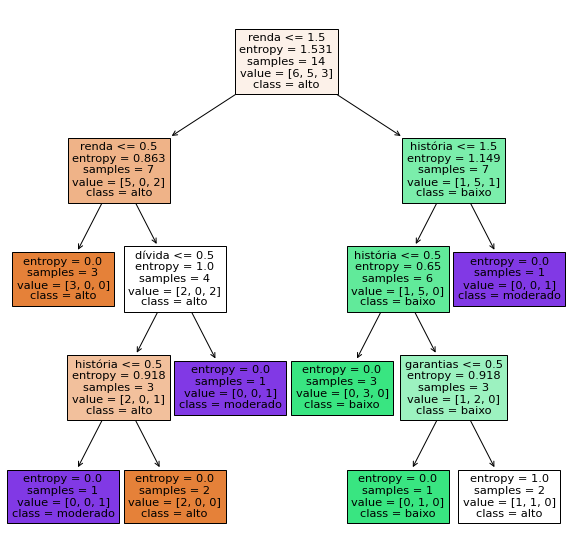

In [ ]:
# visualizando a arvore de decisão
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names= arvore_risco_credito.classes_, filled=True);

In [ ]:
 # historia boa (0) divida alta (0) garantias nenhuma (1) renda > 35 (2)
# historia ruim (2) divida alta (0) garantias adequadas (0) renda < 15 (0) 
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

APLICANDO O ALGORITMO: REGRESSÃO LOGISTICA

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito # 2, 7, 11 # apagando para ficarem apenas alto e baixo

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [ ]:
# importando a biblioteca do regressão logistica
from sklearn.linear_model import LogisticRegression

In [ ]:
# fazendo o treinamento
logistic_risco_credito = LogisticRegression(random_state=0)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=0)

In [ ]:
previsoesTeste = logistic_risco_credito.predict([[0,0,1,2], [2, 0,0,0]])
previsoesTeste

array(['baixo', 'alto'], dtype=object)